In [1]:
import os  # <--- Add this line
from langgraph.graph import StateGraph ,START, END
from typing import TypedDict ,Literal,Annotated
from langchain_ollama import ChatOllama
from dotenv import load_dotenv
from pydantic import BaseModel 
from langchain_core.messages import BaseMessage,SystemMessage, HumanMessage



In [2]:
load_dotenv()
llm=ChatOllama(model="llama3.2:latest")

In [3]:
# add_messages is a function that takes in a list of messages and returns a list of messages. It is used to add messages to the chat state.
# BaseMessage is a class that represents a message in the chat. It has two attributes: content and role. content is the text of the message and role is the role of the message (system, human, or assistant).
from langgraph.graph.message import add_messages

class chatState(TypedDict):

    messages:Annotated[ list[BaseMessage] , add_messages]


In [4]:
def chat_node(state:chatState):

    #take user query froom state
    meassages = state['messages']

    #send to llm 
    response=llm.invoke(meassages)

    #response store state
    return {'messages':[response]}

In [5]:
graph = StateGraph(chatState)

graph.add_node('chat_node' , chat_node )

graph.add_edge(START, 'chat_node')
graph.add_edge('chat_node', END)    

chatbot = graph.compile()

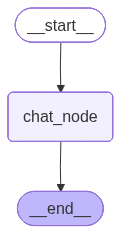

In [6]:
chatbot

In [7]:
message={'messages':[HumanMessage(content="What is langraph?")]}
chatbot.invoke(message)


ConnectError: [Errno 111] Connection refused